In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1]:
temperature_data = pd.read_excel('datasets/temp.xlsx')
temperature_data

<IPython.core.display.Javascript object>

,Date,Delhi,Kolkata,Mumbai,Chennai
0,April 19 2018,74.07,76.77,81.92,76.84
1,April 18 2018,74.02,76.73,81.87,76.79
2,April 17 2018,74.02,76.73,81.87,76.79
3,April 16 2018,74.02,76.73,81.87,76.79
4,April 15 2018,73.98,76.69,81.83,76.75
...,...,...,...,...,...
369,August 01 2014,72.51,80.30,80.60,75.78
370,July 01 2014,73.60,81.43,81.75,76.93
371,June 25 2014,71.56,79.42,80.16,74.76
372,June 07 2014,71.51,79.36,80.11,74.71


In [3]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
256/256 - 2s - loss: 0.0240 - 2s/epoch - 8ms/step
Epoch 2/25
256/256 - 1s - loss: 0.0021 - 681ms/epoch - 3ms/step
Epoch 3/25
256/256 - 1s - loss: 0.0020 - 673ms/epoch - 3ms/step
Epoch 4/25
256/256 - 1s - loss: 0.0024 - 684ms/epoch - 3ms/step
Epoch 5/25
256/256 - 1s - loss: 0.0021 - 664ms/epoch - 3ms/step
Epoch 6/25
256/256 - 1s - loss: 0.0019 - 654ms/epoch - 3ms/step
Epoch 7/25
256/256 - 1s - loss: 0.0

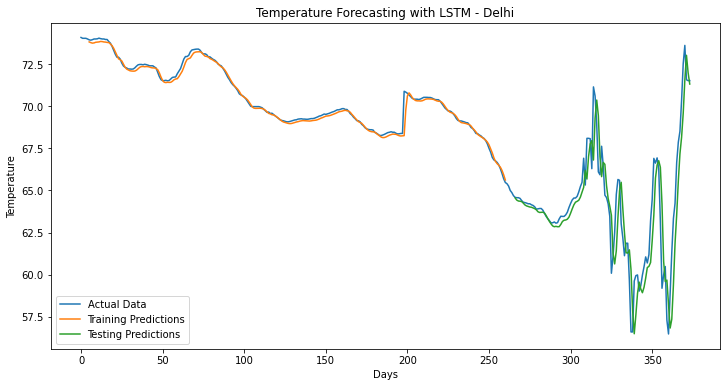

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
256/256 - 2s - loss: 0.0131 - 2s/epoch - 9ms/step
Epoch 2/25
256/256 - 1s - loss: 0.0019 - 659ms/epoch - 3ms/step
Epoch 3/25
256/256 - 1s - loss: 0.0021 - 670ms/epoch - 3ms/step
Epoch 4/25
256/256 - 1s - loss: 0.0020 - 660ms/epoch - 3ms/step
Epoch 5/25
256/256 - 1s - loss: 0.0019 - 670ms/epoch - 3ms/step
Epoch 6/25
256/256 - 1s - loss: 0.0019 - 678ms/epoch - 3ms/step
Epoch 7/25
256/256 - 1s - loss: 0

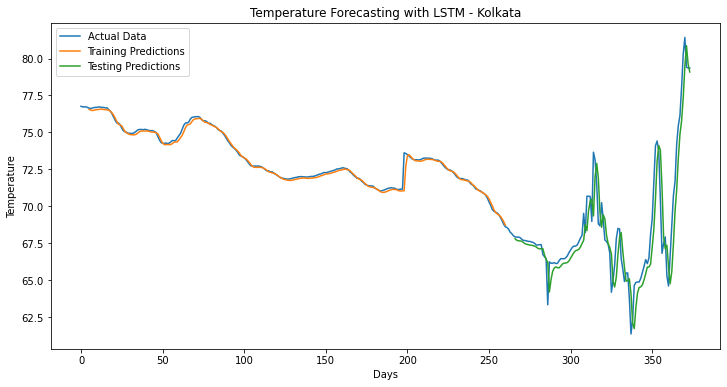

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
256/256 - 2s - loss: 0.0332 - 2s/epoch - 7ms/step
Epoch 2/25
256/256 - 1s - loss: 0.0039 - 646ms/epoch - 3ms/step
Epoch 3/25
256/256 - 1s - loss: 0.0037 - 654ms/epoch - 3ms/step
Epoch 4/25
256/256 - 1s - loss: 0.0034 - 662ms/epoch - 3ms/step
Epoch 5/25
256/256 - 1s - loss: 0.0032 - 666ms/epoch - 3ms/step
Epoch 6/25
256/256 - 1s - loss: 0.0032 - 662ms/epoch - 3ms/step
Epoch 7/25
256/256 - 1s - loss: 0

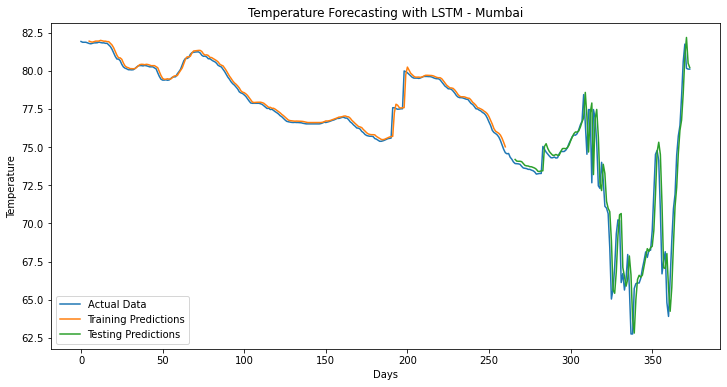

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
256/256 - 2s - loss: 0.0239 - 2s/epoch - 8ms/step
Epoch 2/25
256/256 - 1s - loss: 0.0023 - 636ms/epoch - 2ms/step
Epoch 3/25
256/256 - 1s - loss: 0.0021 - 659ms/epoch - 3ms/step
Epoch 4/25
256/256 - 1s - loss: 0.0023 - 663ms/epoch - 3ms/step
Epoch 5/25
256/256 - 1s - loss: 0.0021 - 641ms/epoch - 3ms/step
Epoch 6/25
256/256 - 1s - loss: 0.0021 - 663ms/epoch - 3ms/step
Epoch 7/25
256/256 - 1s - loss: 0

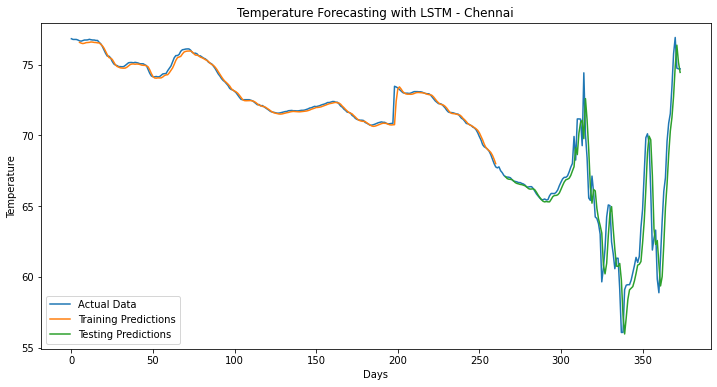

In [4]:
for i in temperature_data.columns.drop('Date'):
    temp = temperature_data[i]
    
    train_size = int(len(temp)*0.7)
    train_data, test_data = temp[0:train_size], temp[train_size:]
    
    train_max = max(train_data)
    train_min = min(train_data)
    test_max = max(test_data)
    test_min = min(test_data)
    
    train_data = (train_data - train_min)/ (train_max - train_min)
    test_data = (test_data - test_min)/ (test_max - test_min)
    
    seq_length = 5
    X_train = create_sequences(train_data, seq_length)
    y_train = train_data[seq_length:]
    X_test = create_sequences(test_data, seq_length)
    y_test = test_data[seq_length:]
    
    model = Sequential()
    model.add(LSTM(50, input_shape = (seq_length, 1)))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    model.summary()
    
    model.fit(X_train, y_train, epochs = 25, batch_size = 1, verbose = 2)
    print("\n")
    
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    print("\n")

    train_predict = train_predict *(train_max - train_min) + train_min
    test_predict = test_predict *(test_max - test_min) + test_min
    
    mae = mean_absolute_error(y_test, test_predict)
    rmse = np.sqrt(mean_squared_error(y_test, test_predict))
    print(f'Accuracy Metrics for {i}:')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print("\n")
    
    plt.figure(figsize=(12, 6))
    plt.plot(temp, label='Actual Data')
    plt.plot(range(seq_length, train_size), train_predict, label='Training Predictions')
    plt.plot(range(train_size + seq_length, len(temp)), test_predict, label='Testing Predictions')
    plt.legend()
    plt.title(f'Temperature Forecasting with LSTM - {i}')
    plt.xlabel('Days')
    plt.ylabel('Temperature')
    plt.show()